# <center> Shearlet denoising </center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from scipy import ndimage as img
from scipy import io as sio
import matplotlib.pyplot as plt
import pyshearlab

In [12]:
from __future__ import division
from nt_toolbox.general import *
from nt_toolbox.signal import *
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


Let $f\in \ell^2(\mathbb{Z}^2)$ and 
   $$f_{\text{noisy}}(i,j)=f(i,j)+e(i,j)$$
with noise $e(i,j)\sim \mathcal{N}(0,\sigma^2)$.  
Then
$$
f_{\text{denoised}}=S^*T_{\delta}S (f_{\text{noisy}})
$$
where $S$ is sparsifying transform (analysis operator of the shearlet system) and $T_{\delta}$ is the hard thersholding operator
$$
(T_{\delta}x)(n)=
\begin{cases}
x(n)\text{  if  }|x(n)|\geq\delta\\
0\text{  else.}
\end{cases}
$$

**Define paramters.**

In [9]:
sigma = 30
scales = 4
thresholdingFactor = 3

**Load data**

In [36]:
# load data
f = img.imread("./data/boat.png")
f = f.astype(float)

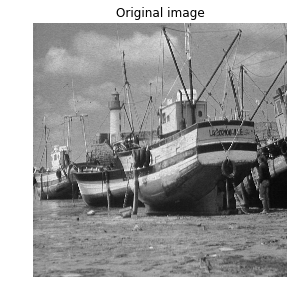

In [37]:
plt.figure(figsize=(10,10))
imageplot(f, 'Original image', [1,2,1])

**Add noise**

In [38]:
# add noise
fnoisy = f + sigma*np.random.randn(f.shape[0], f.shape[1])

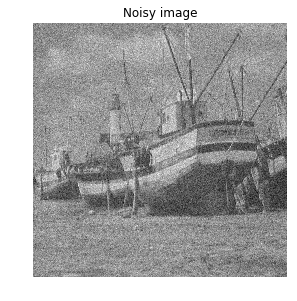

In [39]:
plt.figure(figsize=(10,10))
imageplot(fnoisy, 'Noisy image', [1,2,1])

**Create Shearlet System**

In [42]:
shearletSystem = pyshearlab.SLgetShearletSystem2D(0,f.shape[0], f.shape[1], scales)

**Shearlet decomposition**

In [44]:
coeffs = pyshearlab.SLsheardec2D(fnoisy, shearletSystem)

**Thresholding using the RMS (root mean square) as reference**

In [45]:
oldCoeffs = coeffs.copy()
weights = np.ones(coeffs.shape)

In [47]:
for j in range(len(shearletSystem["RMS"])):
    weights[:,:,j] = shearletSystem["RMS"][j]*np.ones((f.shape[0], f.shape[1]))

In [48]:
coeffs = np.real(coeffs)
zero_indices = np.abs(coeffs) / (thresholdingFactor * weights * sigma) < 1
coeffs[zero_indices] = 0

**Reconstruction**

In [52]:
# reconstruction
frec = pyshearlab.SLshearrec2D(coeffs, shearletSystem)

**Compute the PSNR**

In [62]:
PSNR = pyshearlab.SLcomputePSNR(f,frec)
print("{0:.2f}".format(PSNR))

28.16


**Visualize the denoising**

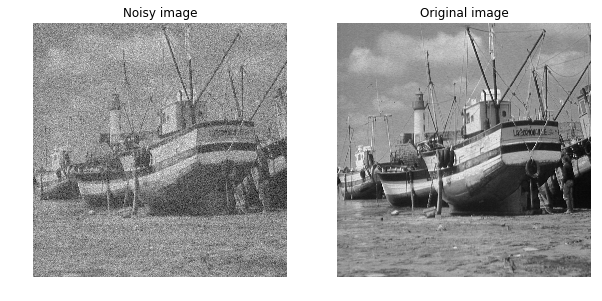

In [57]:
plt.figure(figsize=(10,10))
imageplot(fnoisy, 'Noisy image', [1,2,1])
imageplot(f, 'Original image', [1,2,2])

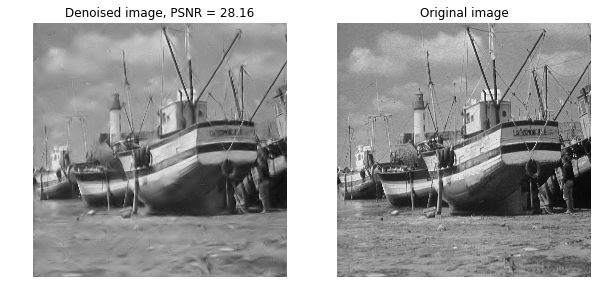

In [61]:
plt.figure(figsize=(10,10))
imageplot(frec, 'Denoised image, PSNR = '+str("{0:.2f}".format(PSNR)), [1,2,1])
imageplot(f, 'Original image', [1,2,2])